# The Method of Lines (MOL) for 1D Heat Eduation

Mohammad Rahmani  
School of Biosciences and Process Technology  
Vaxjo University  
Sweden  

January 2004

Special Tanks are due to *Professor W. E. Schiesser*, Lehigh University for his kind help.

**Reference**  
 Schiesser, W. E. The Numerical Method of Lines, Academic Press Inc., San Diego, CA, 1991.


**Revision 2**  
October 31st, 2025  
- Python implementation in JupyterLab  
- Modular solver that receives `ic` and `bc` functions along with the solver method 

## One Dimensional Heat Conduction in Cartesian Coordinates 
 
According to Fourier law the unsteady state heat conduction in one dimension in 
Cartesian coordinates can be written as following: 

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \quad 0 \leq x \leq 1, \quad t > 0 \tag{1}
$$

I.C:
$$ @ t = 0 \quad u(0,x) = f(x) $$

B.Cs :
$$ @ x = 0 \quad a_l u + b_l \frac{\partial u}{\partial x} = c_l, \quad \text{left BC} \tag{1a} $$
$$ @ x = 1 \quad a_r u + b_r \frac{\partial u}{\partial x} = c_r, \quad \text{right BC} \tag{1b} $$
 
Where, $U$, $t$, and $x$ are dimensionless temperature, time, and spatial coordinates 
respectively. The general homogeneous BCs let us to apply different combinations of 
boundary conditions. $a$, $b$, and $c$ can be defined as functions of $t$. 

# Method of Lines (MOL) 
The Method of Lines (MOL) has been used to solve numerically this problem. 
Applying MOL technique, results in a set of semi-discrete equations (discrete in space 
and continuous in time). Theses equations can be integrated in time using stiff solver 
in Python or Matlab. Below is the step by step implementation of MOL technique for solving the unsteady heat equation.

## 1. Spatial Discretization 

<img src="assets/slab_1d_discretization.png" width="297" height="178" align="right"/>

The spatial coordinate, here $x$, is divided to $n$ 
sections results in $n+1$ grid points, we number them as 
$0,1,...,n$. Using second order centered difference 
formula we can write: 

$$
\frac{du_i}{dt} = \frac{u_{i-1} - 2u_i + u_{i+1}}{\Delta x^2}, \quad 1 \leq i \leq n-1 \tag{2}
$$

On the boundaries we have:



$$\begin{aligned}
i &= 0, \quad
a_l u_0 + b_l \frac{du_0}{dx} = c_l \\
i &= n, \quad
a_r u_n + b_r \frac{du_n}{dx} = c_r
\end{aligned} \tag{3}$$

Using a second order forward difference formula, the left boundary condition can be rewritten as following:

$$\frac{du_0}{dx} = -\frac{3u_0 + 4u_1 - u_2}{2\Delta x} \tag{4}$$

Putting this into the left BC equation results in:

$$u_0 = -\frac{4b_l u_1 + b_l u_2}{2\Delta x \cdot a_l - 3b_l} + \frac{2\Delta x \cdot c_l}{2\Delta x \cdot a_l - 3b_l} \tag{5}$$

In the same way, the right boundary condition can be written, using a second order backward difference formula:

$$\frac{du_n}{dx} = \frac{u_{n-2} - 4u_{n-1} + 3u_n}{2\Delta x} \tag{6}$$

Putting this into the right BC equation results in:

$$u_n = -\frac{b_r u_{n-2} + 4b_r u_{n-1}}{2\Delta x \cdot a_r + 3b_r} + \frac{2\Delta x \cdot c_r}{2\Delta x \cdot a_r + 3b_r} \tag{7}$$

Now we have $n+1$ unknowns, $n+1$ equations (equation set (2), equation (5), and (7)), but the two last are algebraic equations and can be back substituted in equation set (2), when $i=1$ and $i=n-1$. This will reduce the number of equation to the number of ODEs ($n-1$). The resulting set of ODEs with the related initial condition can be integrated in time using $ode15s$ stiff solver in Matlab.

## 2. Assembling the ODE set

If equation (2) is rewritten for all mesh points $(i=1,2,3...n-1)$ and rearranged in vector form, we arrive at the following compact equation:

$$\frac{d\mathbf{u}}{dt} = D * \mathbf{u} \tag{8}$$

where

$$\mathbf{u} = [\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \ldots, \mathbf{u}_{n-2}, \mathbf{u}_{n-1}]^T \tag{9}$$

D is called the differential matrix. It represents the second order differential based on centered difference formula.

$$D = 
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & -2
\end{bmatrix} \tag{10}$$

The first and last row have to correct for boundary conditions. Expanding equation set (2) for $ i=1 $ and $ i=n-1 $ we can write:

For $i = 1$:

$$\frac{d\mathbf{u}_1}{dt} = \frac{\mathbf{u}_0 - 2\mathbf{u}_1 + \mathbf{u}_2}{\Delta x^2} \tag{11}$$

For $i = n - 1$:

$$\frac{d\mathbf{u}_{n-1}}{dt} = \frac{\mathbf{u}_{n-2} - 2\mathbf{u}_{n-1} + \mathbf{u}_n}{\Delta x^2} \tag{12}$$

Back substituting $ u_0 $ and $ u_n $ from equations (5) and (7) in these two equations will results in:

For $i = 1$:

$$\frac{d\mathbf{u}_1}{dt} = \frac{1}{\Delta x^2} \left[ (-4K_1 - 2)\mathbf{u}_1 + (K_1 + 1)\mathbf{u}_2 + \frac{2\Delta x \cdot c_l}{2\Delta x \cdot a_l - 3b_l} \right] \tag{13}$$

where:

$$K_1 = \frac{b_l}{2\Delta x \cdot a_l - 3b_l} \tag{14}$$

For $i = n - 1$:

$$\frac{du_{n-1}}{dt} = \frac{1}{\Delta x^2} \left[ (1 - K_2)u_{n-2} + (-2 + 4K_2)u_{n-1} + \frac{2\Delta x \cdot c_r}{2\Delta x \cdot a_r + 3b_r} \right] \tag{15}$$

where:

$$K_2 = \frac{b_r}{2\Delta x \cdot a_r + 3b_r} \tag{16}$$

This new vector form together with the initial values can be fed to Python stiff solver for integration in time. Implementation of equation (8) is very easy and straight forward in Python

## 3. Computer Implementation

The computer implementation has been designed in a structured and modular manner to make it easier to understand, use, and modify. The main function (`solve_heat_1d`) solves the 1D unsteady heat equation using the method of lines. It recives:

* n (int): Number of spatial divisions
* tspan (np.ndarray): Time vector for evaluation
* ic (Callable): Initial condition function, ic(xmesh) -> u0
* bc (Callable): Boundary condition function, bc(t) -> (al, bl, cl, ar, br, cr)
* method (str): ODE solver method (default 'BDF')
* rtol (float): Relative tolerance for solver
* visualize (bool): Whether to call Vgraph for plotting

consists of four sections: describing the time span, spatial grid coordinates, initial condition (function icM), boundary conditions (function bcM), 

The solve_heat_1d implements the PDE based on the MOL technique (function odeM). The "M" indicates the MOL technique. The odeM, contains the set of ODEs resulting from spatial discretization and is used by the stiff ODE solver.

Additionally, there are two utility functions, which are used for discretization (`Uxx`) and optional data visualization (`Vgraph`).



# Python Code

## 1. Calculate the second derivative matrix
The function Uxx sets up the second derivative matrix based on the second order centered difference formula (equation (10)). It returns the second derivatives matrix in sparse form which Python can handle it easily.

In [1]:
import numpy as np
from scipy.sparse import diags

def Uxx(n: int):
    """
    Calculate the second derivative matrix (Uxx) using
    second-order centered difference formula.

    Parameters:
    n (int): Dimension of the matrix

    Returns:
    scipy.sparse.csr_matrix: Sparse matrix representing the second derivative operator
    """
    if n < 1:
        raise ValueError("Please specify a positive integer for the dimension of Uxx")

    # Main diagonal: -2, upper and lower diagonals: 1
    diagonals = [
        np.ones(n - 1),     # lower diagonal
        -2 * np.ones(n),    # main diagonal
        np.ones(n - 1)      # upper diagonal
    ]
    offsets = [-1, 0, 1]

    D = diags(diagonals, offsets, shape=(n, n), format='csr')
    return D

**Test Uxx**

In [2]:
# Example usage and test
n = 5
D = Uxx(n)
print(f"Second derivative matrix (Uxx) for n={n}:\n")
print(D.toarray())

Second derivative matrix (Uxx) for n=5:

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


## 2. Visualize the results
Vgraph is a data visualization tool that is optional, allowing users to implement their own visualization functions if preferred. It takes xmesh, a time vector, and the solution ($u$) as inputs, generating a surface plot, a contour plot, and a u profile at $t = 0, 0.25tf, 0.5tf, 0.75tf, tf$, where $tf$, represents the final time.

In [3]:
import matplotlib.pyplot as plt
def Vgraph(t: np.ndarray, xmesh: np.ndarray, u: np.ndarray):
    """
    Visualizes the solution of the 1D heat equation.

    Parameters:
        t (np.ndarray): Time vector
        xmesh (np.ndarray): Spatial mesh points
        u (np.ndarray): Solution matrix
    """
    nr, nc = u.shape
    timepoints = [0, nr // 4, nr // 2, (3 * nr) // 4, nr - 1]

    # Profile plot
    plt.figure()
    for tp in timepoints:
        plt.plot(xmesh, u[tp], label=f"t={t[tp]:.3f}")
    plt.title("Dimensionless Temperature Distribution")
    plt.xlabel("Dimensionless x")
    plt.ylabel("u(t,x)")
    plt.legend()
    plt.grid(True)

    # Contour plot
    plt.figure()
    C = plt.contour(xmesh, t, u)
    plt.clabel(C)
    plt.title("Temperature Contour Plot")
    plt.xlabel("Dimensionless x")
    plt.ylabel("Time")

    # Surface plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, T = np.meshgrid(xmesh, t)
    surf = ax.plot_surface(X, T, u, cmap='plasma')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    ax.set_title(f"1D Heat Equation with {nc} mesh points")
    ax.set_xlabel("Spatial coordinate, x")
    ax.set_ylabel("Time, t")
    ax.set_zlabel("Temperature/Temp., u")
    fig.tight_layout()

    plt.show()

**Test vgraph**

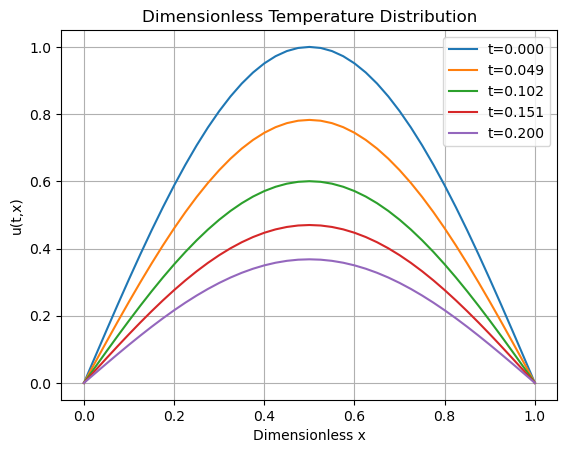

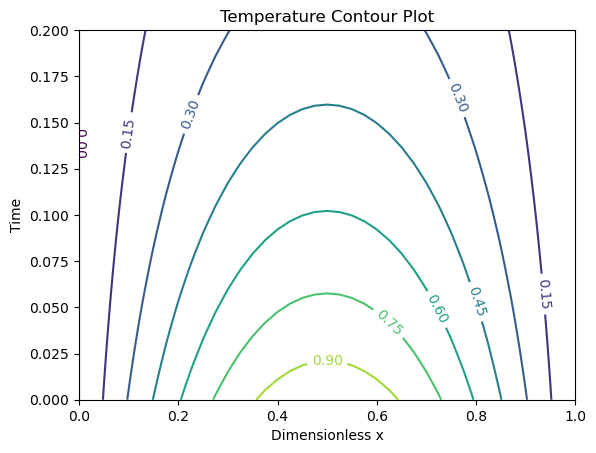

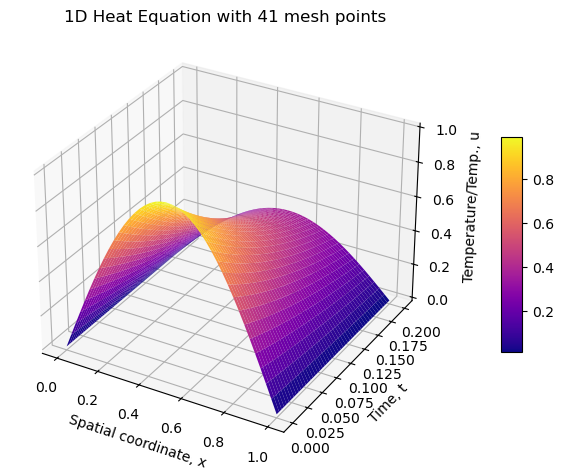

In [4]:
# Synthetic test data
xmesh = np.linspace(0, 1, 41)
t = np.linspace(0, 0.2, 50)
X, T = np.meshgrid(xmesh, t)
u = np.exp(-5 * T) * np.sin(np.pi * X)

Vgraph(t, xmesh, u)

## 3. Solver 1D Heat Equation
Function `solve_heat_1d` implements the unstady sate heat equation in one dimensional (slab geometry) as described by equation set (1).

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from typing import Callable

def solve_heat_1d(
    nx: int,
    tspan: tuple[float, float],
    ic: Callable[[np.ndarray], np.ndarray],
    bc: Callable[[float | np.ndarray], tuple],
    nt: int = 100,
    method: str = 'BDF',
    rtol: float = 1e-3,
    visualize: bool = True) -> tuple[np.ndarray, np.ndarray, np.ndarray]:

    """
    Solves the 1D heat equation using the method of lines.

    Parameters:
        nx (int): Number of spatial divisions
        tspan (np.ndarray): Time vector for evaluation
        ic (Callable): Initial condition function, ic(xmesh) -> u0
        bc (Callable): Boundary condition function, bc(t) -> (al, bl, cl, ar, br, cr)
        nt (int): Number of time intervals        
        method (str): ODE solver method (default 'BDF')
        rtol (float): Relative tolerance for solver
        visualize (bool): Whether to call Vgraph for plotting

    Returns:
        t (np.ndarray): Time vector
        xmesh (np.ndarray): Spatial mesh points
        U (np.ndarray): Solution matrix, U[i,j] = u(t[i], xmesh[j])
    """
    # Default domain
    xl, xr = 0.0, 1.0
    dx = (xr - xl) / nx
    xmesh = np.linspace(xl, xr, nx + 1)

    ui = ic(xmesh)
    D = Uxx(nx - 1)

    def odeM(t: float, u: np.ndarray) -> np.ndarray:
        dudt = D @ u / dx**2
        al, bl, cl, ar, br, cr = bc(t)

        # Left boundary correction
        K1 = bl / (2 * dx * al - 3 * bl)
        dudt[0] = ([-4 * K1 - 2, K1 + 1] @ u[:2] + 2 * dx * cl / (2 * dx * al - 3 * bl)) / dx**2

        # Right boundary correction
        K2 = br / (2 * dx * ar + 3 * br)
        dudt[-1] = ([1 - K2, -2 + 4 * K2] @ u[-2:] + 2 * dx * cr / (2 * dx * ar + 3 * br)) / dx**2

        return dudt

    t_eval = np.linspace(tspan[0], tspan[1], nt + 1)
    sol = solve_ivp(odeM, tspan, ui[1:-1], t_eval=t_eval, method=method, rtol=rtol)


    t = sol.t
    u = sol.y.T

    # Reconstruct full solution matrix
    al, bl, cl, ar, br, cr = bc(t)
    u0 = (-4 * bl * u[:, 0] + bl * u[:, 1] + 2 * dx * cl) / (2 * dx * al - 3 * bl)
    un = (-br * u[:, -2] + 4 * br * u[:, -1] + 2 * dx * cr) / (2 * dx * ar + 3 * br)
    U = np.column_stack([u0, u, un])
    U[0, :] = ui

    if visualize:
        Vgraph(t, xmesh, U)

    return t, xmesh, U


# Examples

## Example 1
As the first example the following situation has been simulated:

@ $t = 0$,

$$
u(0,x) =
\begin{cases} 
x, & 0 \leq x \leq 0.5 \\
1 - x, & 0.5 \leq x \leq 1 
\end{cases}
$$

When $0 < t \leq 0.15$,  

@ $x = 0$, $$ \frac{du}{dx} = 0 $$

@ $x = 1$, $$ \frac{du}{dx} = 0 $$

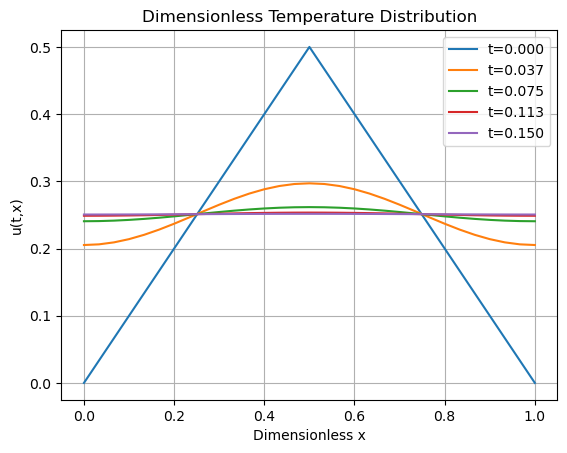

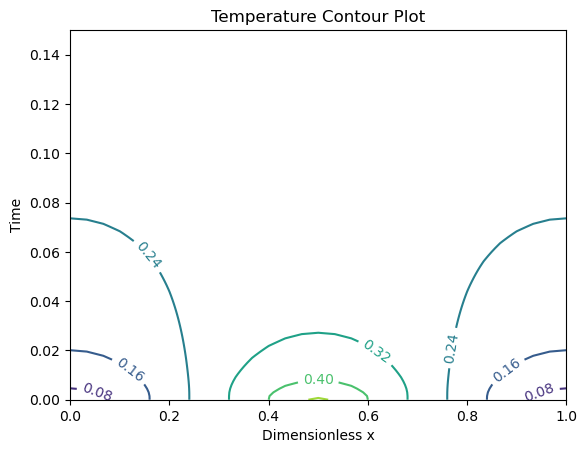

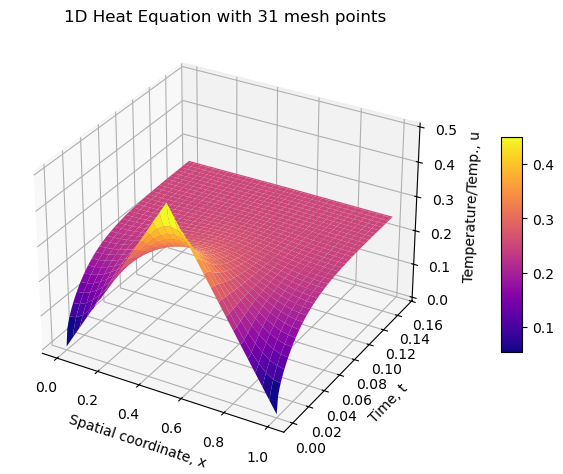

In [6]:
def initial_condition_exmp01(x):
    """Triangular initial condition"""
    return np.where(x <= 0.5, x, 1 - x)

def boundary_conditions_exmp01(t):
    """
    Neumann boundary conditions (insulated boundaries)
    Left BC:  du/dx = 0  ->  al=0, bl=1, cl=0
    Right BC: du/dx = 0  ->  ar=0, br=1, cr=0
    """
    al, bl, cl = 0, 1, 0  # Left: du/dx = 0
    ar, br, cr = 0, 1, 0  # Right: du/dx = 0
    return al, bl, cl, ar, br, cr


tspan = (0, 0.15)
t, xmesh, U = solve_heat_1d(nx=30, tspan=tspan, ic=initial_condition_exmp01, bc=boundary_conditions_exmp01)

## Example 2
The following example simulates a case with simple Dirichlet type boundary conditions:

@ $t = 0$,
$$u(0, x) = sin(2\pi x)$$

When $0 < t \leq 0.1$,  

@ $x = 0$, $$u = 0$$
@ $x = 1$, $$u = 0$$

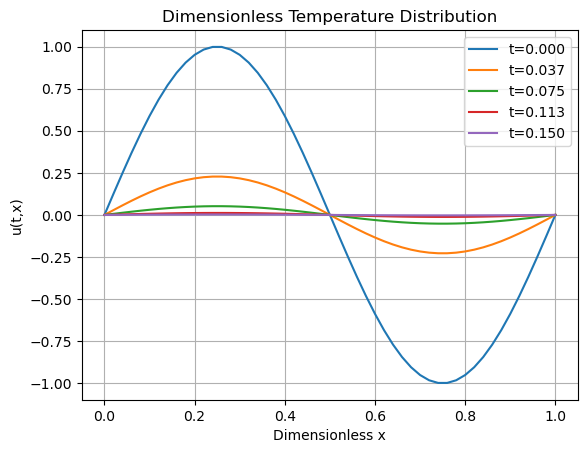

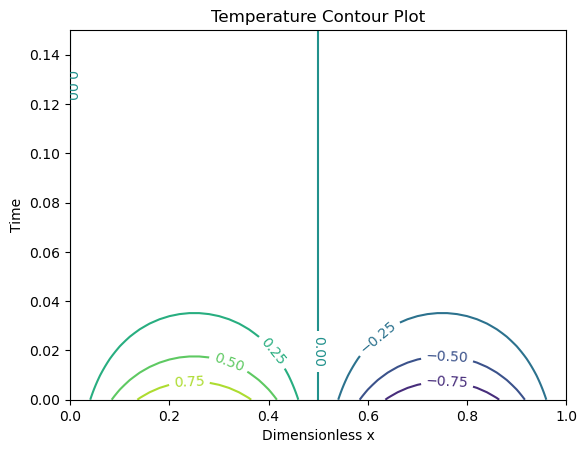

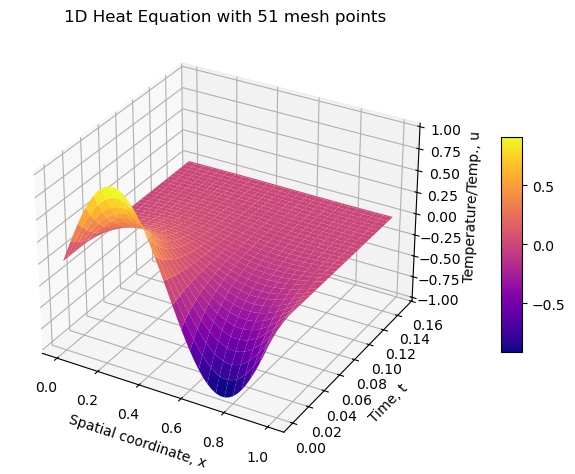

In [7]:
def initial_condition(x):
    """Sinusoidal initial condition: u(x,0) = sin(2πx)"""
    return np.sin(2 * np.pi * x)

def boundary_conditions(t):
    """
    Dirichlet boundary conditions (fixed temperature)
    Left BC:  u = 0  ->  al=1, bl=0, cl=0
    Right BC: u = 0  ->  ar=1, br=0, cr=0
    """
    al, bl, cl = 1, 0, 0  # Left: u = 0
    ar, br, cr = 1, 0, 0  # Right: u = 0
    return al, bl, cl, ar, br, cr
    
# Time span
t_span = (0, 0.1)
t, xmesh, U = solve_heat_1d(nx=50, tspan=tspan, ic=initial_condition, bc=boundary_conditions) 

## Example 3 with Error Analysis
The third example is a test problem taken from Matlab®. This example has an analytical solution so, it is possible to compare our results with the exact solution. The PDE and its IC and BCs have been converted to Heat1D format as following:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$

@ $t = 0$,    $$u(0, x) = sin(\pi x)$$

When $0 < t \leq 2 / \pi^2$, 

@ $x = 0$,    $$u = 0$$

@ $x = 1$,    $$\pi e^{-\pi^2 t} + \frac{\partial u}{\partial x} = 0$$

One analytical solution of the above PDE is

$$u(x, t) = e^{-\pi^2 t} sin(\pi x)$$

In the the following section we implement the above PDE and compare the absolute error in our solution. The new IC, BCs and time interval in the HeatEq_1D.m were defined here:


In [8]:
def ic(xmesh):
    return np.sin(np.pi * xmesh)

def bc(t):
    al, bl, cl = 1.0, 0.0, 0.0
    ar, br = 0.0, 1.0
    cr = -np.pi * np.exp(-np.pi**2 * t)
    return al, bl, cl, ar, br, cr

tspan = (0, 2 / np.pi**2)
t, xmesh, U = solve_heat_1d(nx=25, tspan=tspan, ic=ic, bc=bc, nt=15, visualize=False)


### Analytical Solution

In [9]:
def analytical_solution(x, t):
    """Analytical solution: u(x,t) = e^(-π²t) sin(πx)"""
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

### Custom graphs for comparison

In [10]:
def plot_results(t, xmesh, U):
    """Create visualization plots for Example 3"""
    
    # Calculate analytical solution for comparison in main plots
    xx, tt = np.meshgrid(xmesh, t)
    uex = analytical_solution(xx, tt)
    
    # 1. Surface plot - Numerical solution
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = fig.add_subplot(131, projection='3d')
    surf1 = ax1.plot_surface(xx, tt, U, cmap='viridis', alpha=0.8)
    ax1.set_xlabel('Spatial coordinate, x')
    ax1.set_ylabel('Time, t')
    ax1.set_zlabel('Numerical u(t,x)')
    ax1.set_title('Numerical Solution - Example 3')
    fig.colorbar(surf1, ax=ax1, shrink=0.5)
    
    # 2. Surface plot - Analytical solution
    ax2 = fig.add_subplot(132, projection='3d')
    surf2 = ax2.plot_surface(xx, tt, uex, cmap='plasma', alpha=0.8)
    ax2.set_xlabel('Spatial coordinate, x')
    ax2.set_ylabel('Time, t')
    ax2.set_zlabel('Analytical u(t,x)')
    ax2.set_title('Analytical Solution - Example 3')
    fig.colorbar(surf2, ax=ax2, shrink=0.5)
    
    # 3. Surface plot - Error
    ax3 = fig.add_subplot(133, projection='3d')
    error = np.abs(U - uex)
    surf3 = ax3.plot_surface(xx, tt, error, cmap='hot', alpha=0.8)
    ax3.set_xlabel('Spatial coordinate, x')
    ax3.set_ylabel('Time, t')
    ax3.set_zlabel('Absolute Error')
    ax3.set_title('Absolute Error - Example 3')
    fig.colorbar(surf3, ax=ax3, shrink=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Contour plots
    plt.figure(figsize=(15, 4))

    # Numerical solution
    plt.subplot(1, 3, 1)
    contour1 = plt.contourf(xx, tt, U, levels=20, cmap='viridis')
    plt.xlabel('Dimensionless x')
    plt.ylabel('Dimensionless time')
    plt.title('Numerical Solution Contour')
    plt.colorbar(contour1)

    # Analytical solution
    plt.subplot(1, 3, 2)
    contour2 = plt.contourf(xx, tt, uex, levels=20, cmap='plasma')
    plt.xlabel('Dimensionless x')
    plt.ylabel('Dimensionless time')
    plt.title('Analytical Solution Contour')
    plt.colorbar(contour2)

    # Error
    plt.subplot(1, 3, 3)
    contour3 = plt.contourf(xx, tt, error, levels=20, cmap='hot')
    plt.xlabel('Dimensionless x')
    plt.ylabel('Dimensionless time')
    plt.title('Error Contour')
    plt.colorbar(contour3)
    
    plt.tight_layout()
    plt.show()

### Custom graphs for error analyis

In [11]:
def compare_with_analytical(t, xmesh, U):
    """Compare numerical solution with analytical solution"""
    
    # Create meshgrid for analytical solution (equivalent to MATLAB's meshgrid)
    xx, tt = np.meshgrid(xmesh, t)
    
    # Calculate analytical solution on grid points
    uex = analytical_solution(xx, tt)
    
    # Calculate absolute error
    errsol = np.abs(U - uex)
    
    # Plot absolute error versus time for all spatial points
    plt.figure(figsize=(12, 5))
   
    # Plot 1: Error vs time for all spatial points
    plt.subplot(1, 2, 1)
    for i in range(len(xmesh)):
        if i % 5 == 0:  # Plot every 5th spatial point to avoid clutter
            plt.plot(t, errsol[:, i], alpha=0.7, label=f'x = {xmesh[i]:.2f}')
    
    plt.xlabel('Dimensionless time, t')
    plt.ylabel('abs(U - uex)')
    plt.title('Absolute Error vs Time for Different x Positions')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Error vs space for all time points
    plt.subplot(1, 2, 2)
    for i in range(len(t)):
        if i % 2 == 0:  # Plot every 2nd time point to avoid clutter
            plt.plot(xmesh, errsol[i, :], alpha=0.7, label=f't = {t[i]:.3f}')
    
    plt.xlabel('Dimensionless spatial variable, x')
    plt.ylabel('abs(U - uex)')
    plt.title('Absolute Error vs Space for Different Times')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional error analysis
    analyze_errors(t, xmesh, U, uex, errsol)

def analyze_errors(t, xmesh, U, uex, errsol):
    """Detailed error analysis"""
    
    # Maximum error over space and time
    max_error = np.max(errsol)
    mean_error = np.mean(errsol)
    rms_error = np.sqrt(np.mean(errsol**2))
    
    print("Error Analysis:")
    print(f"Maximum absolute error: {max_error:.2e}")
    print(f"Mean absolute error: {mean_error:.2e}")
    print(f"RMS error: {rms_error:.2e}")
    
    # Error evolution over time
    max_error_over_time = np.max(errsol, axis=1)
    mean_error_over_time = np.mean(errsol, axis=1)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, max_error_over_time, 'r-', linewidth=2, label='Max error')
    plt.plot(t, mean_error_over_time, 'b-', linewidth=2, label='Mean error')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.title('Error Evolution Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Error distribution over space
    max_error_over_space = np.max(errsol, axis=0)
    mean_error_over_space = np.mean(errsol, axis=0)
    
    plt.subplot(1, 2, 2)
    plt.plot(xmesh, max_error_over_space, 'r-', linewidth=2, label='Max error')
    plt.plot(xmesh, mean_error_over_space, 'b-', linewidth=2, label='Mean error')
    plt.xlabel('Spatial coordinate x')
    plt.ylabel('Error')
    plt.title('Error Distribution Over Space')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compare numerical and analytical solutions at final time
    plt.figure(figsize=(10, 6))
    plt.plot(xmesh, U[-1, :], 'b-', linewidth=2, label='Numerical solution')
    plt.plot(xmesh, uex[-1, :], 'r--', linewidth=2, label='Analytical solution')
    plt.xlabel('Spatial coordinate x')
    plt.ylabel('u(x,t)')
    plt.title(f'Comparison at Final Time (t = {t[-1]:.3f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

### Numerical and analytical results in 3D plots

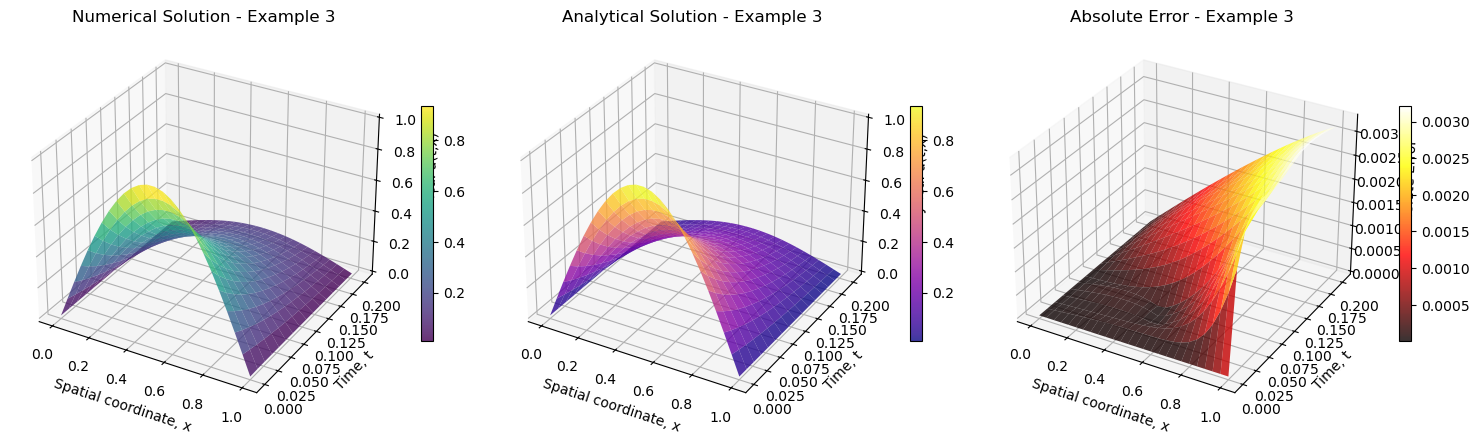

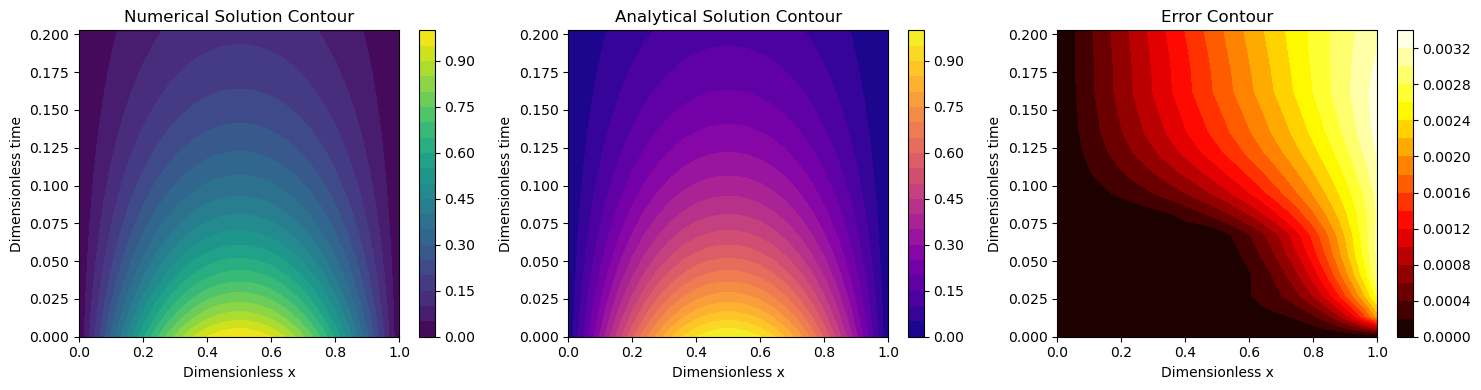

In [12]:
plot_results(t, xmesh, U)

### Error Analysis

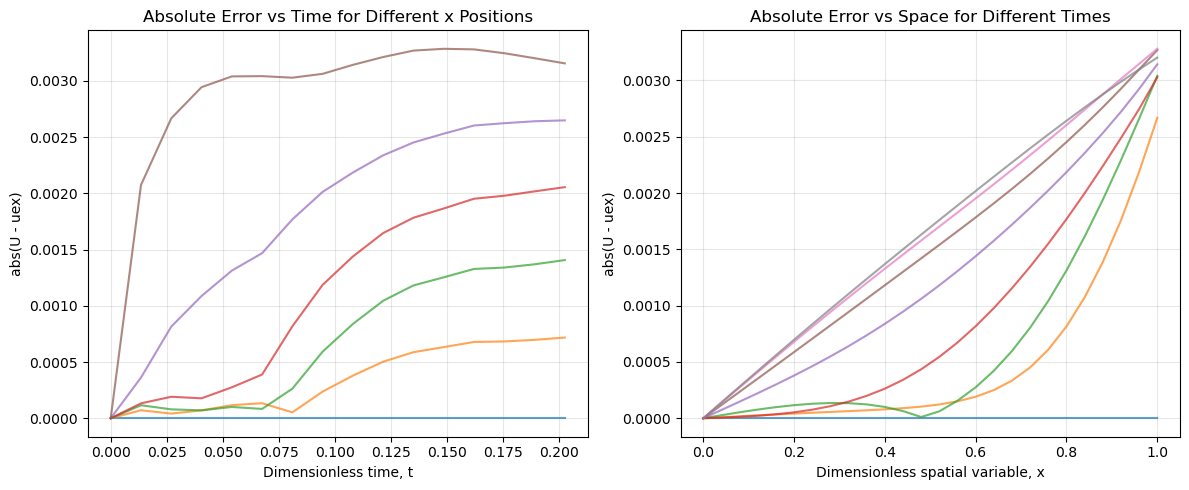

Error Analysis:
Maximum absolute error: 3.29e-03
Mean absolute error: 1.08e-03
RMS error: 1.49e-03


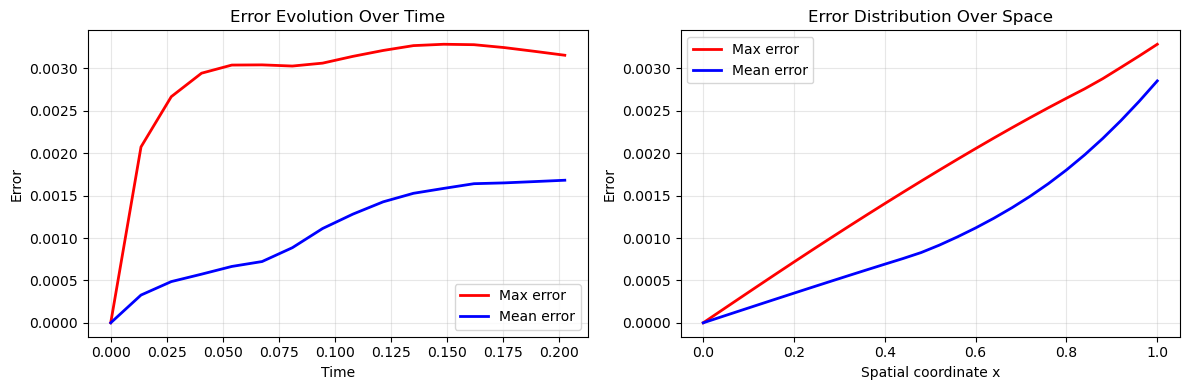

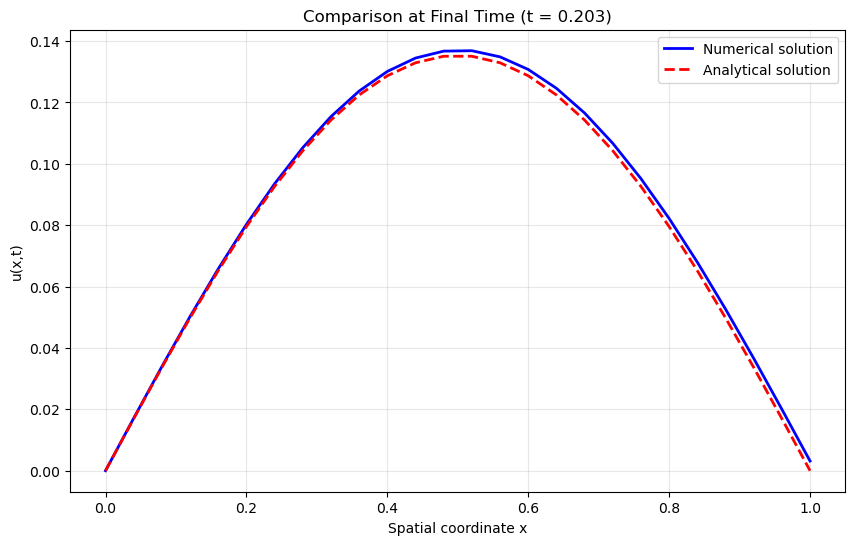

In [13]:
compare_with_analytical(t, xmesh, U)